In [1]:
import pandas as pd
import numpy as np
import altair as alt
import datetime
from sklearn.linear_model import LinearRegression
alt.data_transformers.enable('json')
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
file = 'cpi_index.csv'
dat = pd.read_csv(file, index_col=0)
dat.index = pd.to_datetime(dat.index)
dat = dat.sort_index()

In [3]:
# or alternatively create a data frame of percentage changes
dat_pct_chg = dat.pct_change(periods=12)

In [4]:
#created seperate data frame
#dat['cpi_pct_chg'] = dat.cpi.pct_change(periods=12)
#dat['cpi_goods_pct_chg'] = dat.cpi_goods.pct_change(periods=12)
#dat['cpi_services_pct_chg'] = dat.cpi_services.pct_change(periods=12)

In [5]:
dat_pct_chg

,cpi,cpi_goods,cpi_services,retail_sales,avg_hourly_earnings,ECI
1913-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1913-02-01,NaN,NaN,NaN,NaN,NaN,NaN
1913-03-01,NaN,NaN,NaN,NaN,NaN,NaN
1913-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1913-05-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2022-02-01,0.078711,0.123024,0.043952,0.177070,0.051931,0.046186
2022-03-01,0.085425,0.117484,0.046712,0.070681,0.056221,0.046186
2022-04-01,0.082586,0.097422,0.049251,0.078160,0.054967,0.037474
2022-05-01,0.085815,0.084899,0.051644,0.080882,0.053360,0.037474


<AxesSubplot:>

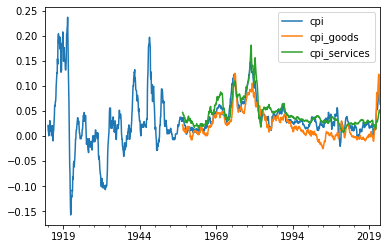

In [6]:
dat_pct_chg[["cpi", "cpi_goods", "cpi_services"]].plot()


<AxesSubplot:>

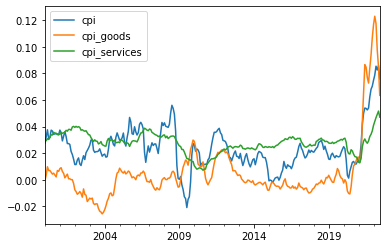

In [7]:
dat_pct_chg["2000":][["cpi", "cpi_goods", "cpi_services"]].plot()

In [8]:
cpi_base = dat['cpi']

In [9]:
cpi_base

1913-01-01      9.800
1913-02-01      9.800
1913-03-01      9.800
1913-04-01      9.800
1913-05-01      9.700
               ...   
2022-02-01    283.716
2022-03-01    287.504
2022-04-01    289.109
2022-05-01    292.296
2022-06-01        NaN
Name: cpi, Length: 1314, dtype: float64

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
model = seasonal_decompose(np.log(dat['cpi']), model = 'multiplicitive',extrapolate_trend = 'freq')

ValueError: This function does not handle missing values

Text(0.513, 0.95, 'CPI Index all urban not seasonally adjusted')

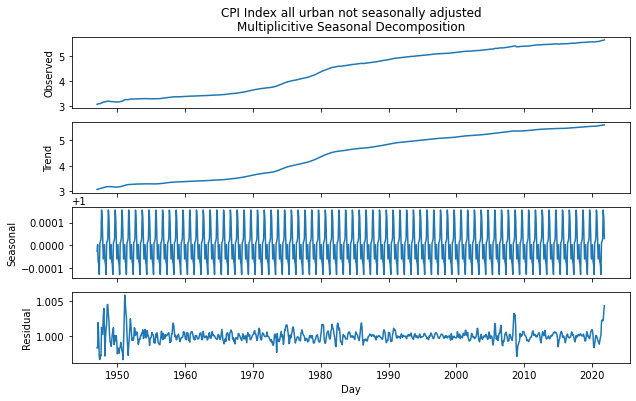

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(10, 6), sharex=True)


axes[0].set_title("Multiplicitive Seasonal Decomposition")
axes[0].plot(model.observed)
axes[0].set_ylabel("Observed")

axes[1].plot(model.trend)
axes[1].set_ylabel("Trend")

axes[2].plot(model.seasonal)
axes[2].set_ylabel("Seasonal")

axes[3].plot(model.resid)
axes[3].set_ylabel("Residual")

axes[3].set_xlabel("Day")
fig.suptitle("CPI Index all urban not seasonally adjusted", x=0.513, y=0.95)

In [ ]:
model_df = pd.DataFrame({"trend" : model.trend, "resid" : model.resid,
 "raw" : np.log(dat.cpi), "seasonal": model.seasonal})

In [ ]:
model_df["cum_resid"] = model_df.resid.cumsum()

In [ ]:
model_df

,trend,resid,raw,seasonal,cum_resid
1947-01-01,3.072217,0.998367,3.067122,0.999974,0.998367
1947-02-01,3.078743,0.998333,3.073619,1.000003,1.996700
1947-03-01,3.085270,1.001942,3.091042,0.999929,2.998642
1947-04-01,3.091796,0.999840,3.091042,0.999916,3.998482
1947-05-01,3.098323,0.997044,3.088767,0.999871,4.995526
...,...,...,...,...,...
2021-07-01,5.593921,1.002281,5.606776,1.000016,894.998795
2021-08-01,5.597036,1.002200,5.609516,1.000030,896.000995
2021-09-01,5.600151,1.002251,5.613632,1.000156,897.003246
2021-10-01,5.603265,1.003401,5.623021,1.000124,898.006647


<AxesSubplot:>

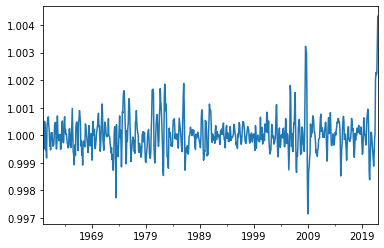

In [ ]:
model.resid["1960":].plot()

In [ ]:
dat

,cpi,cpi_goods,cpi_services,retail_sales,avg_hourly_earnings,ECI
1947-01-01,21.480,NaN,NaN,NaN,NaN,NaN
1947-02-01,21.620,NaN,NaN,NaN,NaN,NaN
1947-03-01,22.000,NaN,NaN,NaN,NaN,NaN
1947-04-01,22.000,NaN,NaN,NaN,NaN,NaN
1947-05-01,21.950,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-07-01,272.265,155.986,355.179,615250.0,30.55,146.2
2021-08-01,273.012,156.488,355.153,622383.0,30.67,NaN
2021-09-01,274.138,156.876,356.017,626999.0,30.84,NaN
2021-10-01,276.724,158.511,357.616,638190.0,30.95,NaN


In [ ]:
cf_cycles, cf_trend = sm.tsa.filters.cffilter(np.log(dat["1975":][["cpi", "cpi_goods", "cpi_services"]]))

NameError: name 'cf_cycles' is not defined

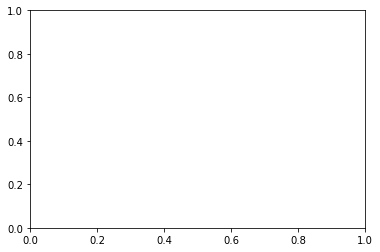

In [11]:
fig, ax = plt.subplots()
cf_cycles.plot(ax=ax, style=['r--', 'b-'])
plt.show()

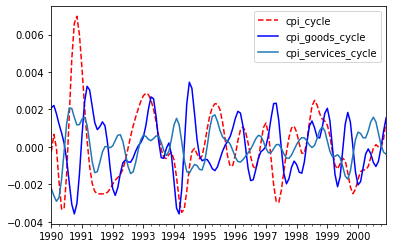

In [ ]:
fig, ax = plt.subplots()
cf_cycles["1990":"2000"].plot(ax=ax, style=['r--', 'b-'])
plt.show()

NameError: name 'cf_cycles' is not defined

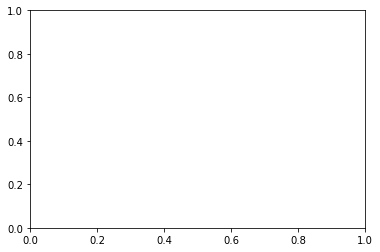

In [12]:
fig, ax = plt.subplots()
cf_cycles["2000":"2010"].plot(ax=ax, style=['r--', 'b-'])
plt.show()

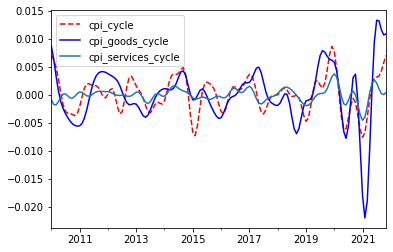

In [ ]:
fig, ax = plt.subplots()
cf_cycles["2010":"2022"].plot(ax=ax, style=['r--', 'b-'])
plt.show()

In [13]:
cycle, trend = sm.tsa.filters.hpfilter(np.log(dat.cpi), 129600)


<AxesSubplot:>

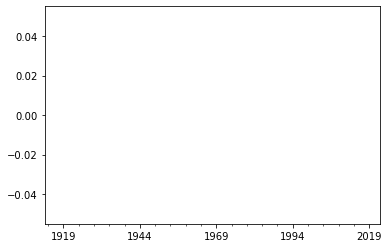

In [14]:
trend.plot()

In [15]:
cpi_decomp = pd.DataFrame({"cycle" : cycle , "trend": trend, "log_cpi" : np.log(dat.cpi)})

In [16]:
cpi_decomp[['cpi']]

KeyError: "None of [Index(['cpi'], dtype='object')] are in the [columns]"

<AxesSubplot:>

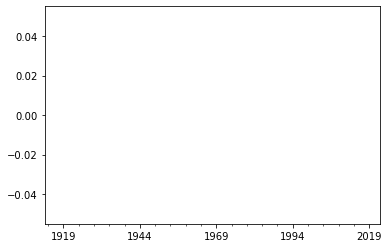

In [17]:
cpi_decomp['cycle'].plot()

<AxesSubplot:>

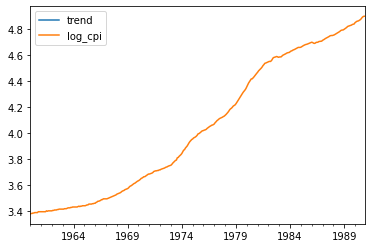

In [18]:
cpi_decomp["1960":"1990"][['trend', 'log_cpi']].plot()

In [19]:
cpi_decomp_pct_change  = np.exp(cpi_decomp[['trend', 'log_cpi']]).pct_change(12)


<AxesSubplot:>

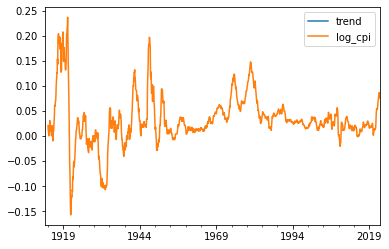

In [20]:
cpi_decomp_pct_change.plot()

<AxesSubplot:>

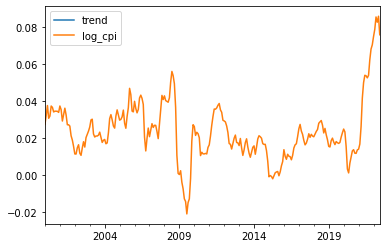

In [21]:
cpi_decomp_pct_change["2000":].plot()

<AxesSubplot:>

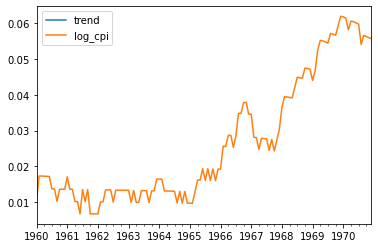

In [22]:
cpi_decomp_pct_change["1960":"1970"].plot()

In [23]:
model.seasonal[-12:]

NameError: name 'model' is not defined

In [ ]:
dat.cpi[-1]

278.88

In [ ]:
model.trend

1947-01-01    3.072217
1947-02-01    3.078743
1947-03-01    3.085270
1947-04-01    3.091796
1947-05-01    3.098323
                ...   
2021-07-01    5.593921
2021-08-01    5.597036
2021-09-01    5.600151
2021-10-01    5.603265
2021-11-01    5.606380
Name: trend, Length: 899, dtype: float64

In [24]:
mod = sm.tsa.arima.ARIMA(dat.cpi, order=(1, 1, 1))
res = mod.fit()
print(res.summary())

c:\Users\jon_r\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\jon_r\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\jon_r\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                    cpi   No. Observations:                 1314
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -588.821
Date:                Fri, 03 Feb 2023   AIC                           1183.641
Time:                        15:11:01   BIC                           1199.182
Sample:                    01-01-1913   HQIC                          1189.469
                         - 06-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6513      0.012     54.223      0.000       0.628       0.675
ma.L1          0.0771      0.017      4.671      0.000       0.045       0.109
sigma2         0.1436      0.002     58.016      0.0

In [25]:
res.forecast(steps = 12)

2022-07-01    296.006249
2022-08-01    296.959358
2022-09-01    297.580120
2022-10-01    297.984424
2022-11-01    298.247748
2022-12-01    298.419252
2023-01-01    298.530953
2023-02-01    298.603704
2023-03-01    298.651087
2023-04-01    298.681948
2023-05-01    298.702047
2023-06-01    298.715138
Freq: MS, Name: predicted_mean, dtype: float64

In [26]:
dat.cpi[-13:]


2021-06-01    271.696
2021-07-01    273.003
2021-08-01    273.567
2021-09-01    274.310
2021-10-01    276.589
2021-11-01    277.948
2021-12-01    278.802
2022-01-01    281.148
2022-02-01    283.716
2022-03-01    287.504
2022-04-01    289.109
2022-05-01    292.296
2022-06-01        NaN
Name: cpi, dtype: float64

In [27]:
model.trend


NameError: name 'model' is not defined